In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pydataset import data

### $H_0$ is the status quo, there is no change or no effect
### $H_a$ is that there is a difference

$\alpha$ is 1 - confidence level, this is typically .05, .01, or .001


### If $p$ < $\alpha$, then we reject the $H_0$ (null hypothesis)

### If $p$ >= $\alpha$, then we fail to reject $H_0$ (null hypothesis)

## Exercise 1
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [18]:
alpha = 0.05
office_1 = stats.norm(90, 15).rvs(10_000)
office_2 = stats.norm(100, 20).rvs(10_000)

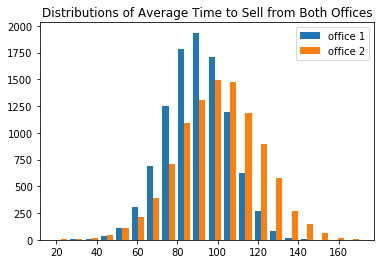

In [19]:
plt.title("Distributions of Average Time to Sell from Both Offices")
plt.hist([office_1, office_2], bins=20, label=["office 1", "office 2"])
plt.legend(loc="upper right")
plt.show()

In [25]:
alpha = 0.05

t, p = stats.ttest_ind(office_1, office_2)

null_hypothesis = "there is no difference"
alternative_hypothesis = "there is a difference in average time to sell between office 1 and office 2"

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept that", alternative_hypothesis)
else:
    print("We faile to reject the hypothesis")

We reject the null hypothesis that there is no difference
We accept that there is a difference in average time to sell between office 1 and office 2


## Exercise 2

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [27]:
df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [67]:
# Is there a difference in avg fuel-efficiency in cars from 2008 vs 1999?
null_hypothesis = "2008 and 1999 cars have the same fuel efficiency"
alpha = .05

x1 = df[df["year"] == 1999].hwy
x2 = df[df["year"] == 2008].hwy

t, p = stats.ttest_ind(x1, x2)

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


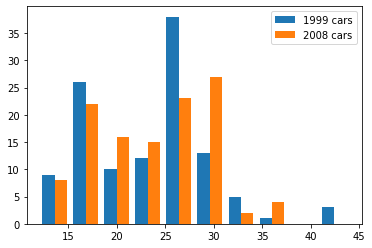

In [68]:
plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [56]:
# Is there a difference in avg fuel-efficiency in cars from 2008 vs 1999?
null_hypothesis = "2008 and 1999 cars have the same fuel efficiency"
alpha = .05

x1 = df[df["year"] == 1999].cty
x2 = df[df["year"] == 2008].cty

t, p = stats.ttest_ind(x1, x2)

if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")  

We fail to reject the null hypothesis


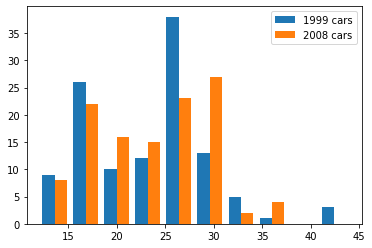

In [69]:
plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

In [94]:
# What about averaging the fuel efficiency?
df["avg_fuel_efficiency"] = (df.hwy + df.cty) / 2
alpha = .05

x1 = df[df["year"] == 1999].avg_fuel_efficiency
x2 = df[df["year"] == 2008].avg_fuel_efficiency

t, p = stats.ttest_ind(x1, x2)
p

0.8263744040323578

In [57]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")  

We fail to reject the null hypothesis


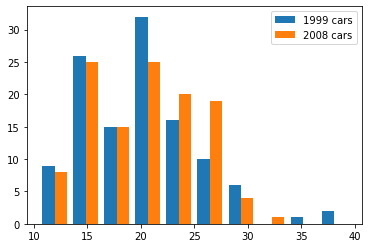

In [66]:
plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

## Are compact cars more fuel-efficient than the average car?

In [77]:
# Are compact cars more fuel-efficient than the average car?

population = df.hwy
compacts = df[df["class"] == "compact"].hwy

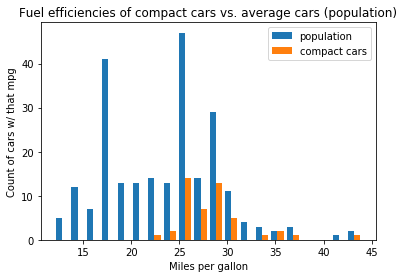

In [78]:
plt.title("Fuel efficiencies of compact cars vs. average cars (population)")
plt.hist([population, compacts], bins=20, label=["population", "compact cars"])
plt.legend(loc="upper right")
plt.xlabel("Miles per gallon")
plt.ylabel("Count of cars w/ that mpg")
plt.show()

In [95]:
t, p = stats.ttest_1samp(compacts, population.mean())
p

1.9716962312411042e-11

In [97]:
null_hypothesis = "compacts and all cars have the same average miles per gallon"
alternative_hypothesis = "There is a difference in avg miles per gallon"
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
    print("We accept the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")  

We reject the null hypothesis that compacts and all cars have the same average miles per gallon
We accept the alternative hypothesis that There is a difference in avg miles per gallon


## Do manual cars get better gas mileage than automatic cars?

In [98]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,overall,avg_fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,51,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,42,21.0


In [108]:
# this is comparing two subgroups so we'll use stats.ttest_ind
# Let's test the highway mileage first
m_hwy = df[df.trans.str.contains("manual")].hwy
a_hwy = df[df.trans.str.contains("auto")].hwy

In [118]:
t, p = stats.ttest_ind(m_hwy, a_hwy)
p

1.888044765552951e-05

In [121]:
alpha = 0.05
if p < alpha:
    print("We reject the null")
    print("There is a difference in Hwy mpg between manuals and automatics")

We reject the null
There is a difference in Hwy mpg between manuals and automatics


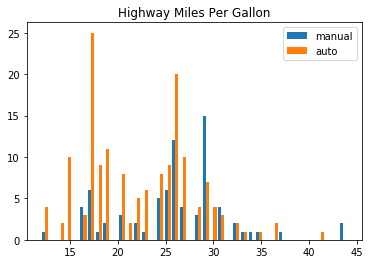

In [116]:
plt.title("Highway Miles Per Gallon")
plt.hist([m_hwy, a_hwy], bins=40, label=["manual", "auto"])
plt.legend(loc="upper right")
plt.show()

In [122]:
# this is comparing two subgroups so we'll use stats.ttest_ind
m_hwy = df[df.trans.str.contains("manual")].cty
a_hwy = df[df.trans.str.contains("auto")].cty
t, p = stats.ttest_ind(m_hwy, a_hwy)
p

3.088973514167085e-06

In [124]:
alpha = 0.05
if p < alpha:
    print("We reject the null")
    print("There is a difference in city MPG between manuals and automatics")

We reject the null
There is a difference in city MPG between manuals and automatics


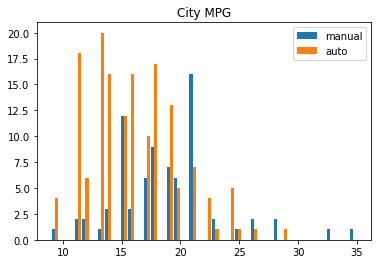

In [126]:
plt.title("City MPG")
plt.hist([m_hwy, a_hwy], bins=40, label=["manual", "auto"])
plt.legend(loc="upper right")
plt.show()